In [1]:
import suite2p
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
import glob
##python -m pip install -U scikit-image
from skimage import measure
from natsort import natsorted
from multiprocessing import Pool
import gc
gc.collect()

3711

In [2]:
opsSetfile=r'C:\Users\User\Project-SLMonlineControl\ops3Planes.npy';
ops0 = np.load(opsSetfile,allow_pickle=True).item()
ops0['input_format']='binary';
#ops0['save_path0']='C:/Users/zhangl33/Projects/Project4-SLMonline/LuSLMOnlineTest/02082024/'
ops0['save_path0']=r'F:\LuSLMOnlineTest\03202024\\'
ops0['Lx']=512  ##Width of a image
ops0['Ly']=512  ##Height of a image
ops0['xrange']=[0,512]
ops0['yrange']=[0,512]
ops0['nplanes']=3
ops0['nchannels']=1
ops0['tau']=0.9
ops0['fs']=6.9;
nplanes=ops0['nplanes'];
binFile = glob.glob(ops0['save_path0'] + '/*Point*.bin')
#print(binFile)
#del statSingleP


In [3]:
binFolder=ops0['save_path0']
## creat new folder to process the data
SaveFolder=os.path.join(ops0['save_path0'], 'suite2p');
SLMxmlFolder=os.path.join(ops0['save_path0'], 'SingleP');
CombinePath=os.path.join(SaveFolder, 'combined');



#ops=np.load(os.path.join(CombinePath, "ops.npy")).Item()
#np.load(os.path.join(CombinePath, "ops.npy"), ops,opsPlane,allow_pickle=True)
loaded_data=np.load(os.path.join(CombinePath, "statUpdate.npz"),allow_pickle=True)
stat=loaded_data['stat']
UnitPlane=loaded_data['UnitPlane']

loaded_data=np.load(os.path.join(CombinePath, "ops.npy"),allow_pickle=True)
#stat=np.load(os.path.join(CombinePath, "stat.npy"),allow_pickle=True)
iscell=np.load(os.path.join(CombinePath, "iscell.npy"))



UnitPlane=np.array(UnitPlane)
#print(UnitPlane==0 && iscell[:,0]==1)
#statSingleP=stat[(UnitPlane==0)&(iscell[:,0]==1)]

stat=stat[iscell[:,0]==1]
UnitPlane=UnitPlane[iscell[:,0]==1]
iscell=iscell[iscell[:,0]==1,:]

temp_mat_data = scipy.io.loadmat(os.path.join(SLMxmlFolder,"SLMIncludedIndFromIscell.mat"))
SinglePInd=temp_mat_data['SLMIncludedIndFromIscell'].flatten()-1      ##Original Index is defined in MATLAB, should -1 for Python Index
print(SinglePInd)

statSingleP=stat[SinglePInd]
PlaneSingleP=UnitPlane[SinglePInd]
SinglePID=SinglePInd+1
print(SinglePID)

[ 9 11 15 16 21 42 44 46 47 50]
[10 12 16 17 22 43 45 47 48 51]


In [16]:
cellIDMap, CellPixCount, MedCenter=Suite2pCellIDMap(ops0,stat,iscell)
#plt.imshow(cellIDMap)
#print(MedCenter)
#ZPlane = [0,60,120]
CellXYZ=np.vstack((MedCenter.T,UnitPlane))
CellXYZ=CellXYZ.T
ZPlane=np.array([0,50,100])
##CellXYZ: 3D Coordinates of Cell Center
for iZ,Zdepth in enumerate(ZPlane):CellXYZ[UnitPlane==iZ, 2] = Zdepth

print(CellXYZ.shape)
#CellXYZ[SinglePInd[CellID],range(2)]

(63, 3)


In [30]:


# Define the base directory
base_dir = ops0['save_path0']
Laser_values = [1.1,1.2]
PointI_values = np.array(range(0,len(statSingleP)))+1
print(PointI_values)

# Define the pattern to search for
file_pattern = 'Laser{}Point{}.bin'
# Define the pattern to search for
file_pattern = 'Point{}.bin'
# List to store matching file paths
matching_files = []

TrialNum=4
#PostPSTH=np.zeros((len(SinglePID),len(Laser_values),len(statSingleP),TrialNum))
print(base_dir)

CellID=2
statCell=[None]
statCell[0]=statSingleP[CellID]
Point=CellID+1
Laser=Laser_values[1]
print(Laser)
SingL=25
plane_idx=PlaneSingleP[CellID]
#CellActivatedID=UnitNeedI[CellID]
#CellActivatedID=PointI_values[CellID]


matching_files = []
file_pattern = f'Laser{Laser}Point{Point}.bin'
print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

print(matching_files)
ops1=ops0

#PSTH=np.zeros((SingL,TrialNum))
print(plane_idx)

[ 1  2  3  4  5  6  7  8  9 10]
F:\LuSLMOnlineTest\03202024\\
1.2
Laser1.2Point3.bin
['F:\\LuSLMOnlineTest\\03202024\\TSeries-03202024-0940-009Laser1.2Point3.bin', 'F:\\LuSLMOnlineTest\\03202024\\TSeries-03202024-0940-031Laser1.2Point3.bin', 'F:\\LuSLMOnlineTest\\03202024\\TSeries-03202024-0940-042Laser1.2Point3.bin', 'F:\\LuSLMOnlineTest\\03202024\\TSeries-03202024-0940-068Laser1.2Point3.bin']
0


F:\LuSLMOnlineTest\03202024\TSeries-03202024-0940-009Laser1.2Point3.bin
(82, 512, 512)
81
0
[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69
 72 75 78]
1
[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70
 73 76 79]
2
[ 2  5  8 11 14 17 20 23 26 29 32 35 38 41 44 47 50 53 56 59 62 65 68 71
 74 77 80]
F:\LuSLMOnlineTest\03202024\TSeries-03202024-0940-031Laser1.2Point3.bin
(81, 512, 512)
81
0
[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69
 72 75 78]
1
[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70
 73 76 79]
2
[ 2  5  8 11 14 17 20 23 26 29 32 35 38 41 44 47 50 53 56 59 62 65 68 71
 74 77 80]
F:\LuSLMOnlineTest\03202024\TSeries-03202024-0940-042Laser1.2Point3.bin
(82, 512, 512)
81
0
[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69
 72 75 78]
1
[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70
 73 76 79]
2
[ 2  5  8 11 14 17 20 23 26 29 32 35 38 

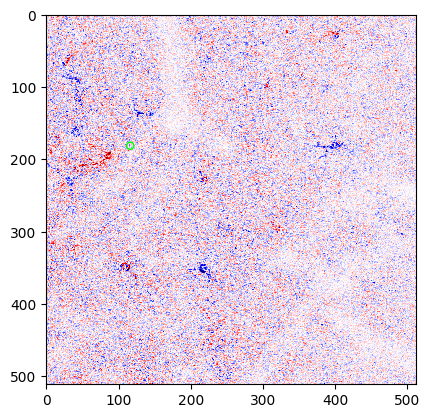

In [31]:

#PSTH=PSTHFromBin(matching_files,statCell,plane_idx,SingL,TrialNum)
#np.shape(PSTH)
#plt.plot(np.mean(PSTH,axis=1))
#fig, ax = plt.subplots(4,4)
#ax[0].plot(np.mean(PSTH,axis=1))
#BaselineInd=range(2,10)
#ResposeInd=range(13,26)
#print(matching_files)
fig, ax = plt.subplots()
ResponseMap=BinList_PSTHHeatMap(matching_files,BaselineInd,ResponseInd,ops0)
#print(ResponseMap.shape)
print(plane_idx)
#ax[1].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
ax.imshow(ResponseMap[plane_idx,:,:],cmap='seismic',vmin=-500,vmax=500)
print(SinglePInd)
print(SinglePInd[CellID])
CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
Radius=5

colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
plotCellCenter(ax, CellXYtemp, Radius, colorCell, LineWidth)


In [13]:
BaselineInd=range(1,10)
ResponseInd=range(13,25)
def BinList_PSTHHeatMap(MultiBinFileList,BaselineInd,ResponseInd,ops0):

   # print(BaselineInd)
   # print(ResponseInd)
    nplanes=ops0['nplanes']
    #print(nplanes)
    baseMap=np.zeros((len(MultiBinFileList),nplanes,ops0['Ly'],ops0['Lx']))
    ResponseMap=np.zeros((len(MultiBinFileList),nplanes,ops0['Ly'],ops0['Lx']))
    for TrialI,Trial in enumerate(MultiBinFileList):
        print(Trial)
        rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
        print(rawBin.shape)
        FramePerPlane=np.floor(rawBin.shape[0]/ops0['nplanes'])
        TotalFrameNeed=np.int32(np.floor(FramePerPlane)*nplanes)
        print(TotalFrameNeed)
    #print(rawBin.shape)
        nplanes=ops0['nplanes']
    
        for plane_id in range(0,nplanes):
            print(plane_id)
                #print(range(0+plane_id,TotalFrameNeed,nplanes))
            print(np.array(range(0+plane_id,TotalFrameNeed,nplanes)))
            plane_data = rawBin[range(0+plane_id,TotalFrameNeed,nplanes),:,:]
        #print(plane_data.shape)
            plane_data=np.double(plane_data)

            baseMap[TrialI,plane_id,:,:]=np.mean(plane_data[BaselineInd,:,:],axis=0)
            ResponseMap[TrialI,plane_id,:,:]=np.mean(plane_data[ResponseInd,:,:],axis=0)

    #DimEnd=len(baseMap.shape)
    baseMap=np.mean(baseMap,axis=0)
    ResponseMap=np.mean(ResponseMap,axis=0)
    ResponseMap=ResponseMap-baseMap
    return ResponseMap


In [5]:
def plotCellCenter(ax, cellCenter, Radius, colorCell, LineWidth):

    if len(colorCell) == 1:
        colorCell = np.tile(colorCell, (cellCenter.shape[0], 1))

    if np.shape(Radius) == 1:
        Radius = np.tile(Radius, cellCenter.shape[0])
    
   # fig, ax = plt.subplots()
    if len(cellCenter.shape)==1:
       cellN=1
       CoorDim=len(cellCenter)
    else:
       CoorDim=cellCenter.shape[1]

    #print(cellN)
    # Loop through each center point
    if cellN==1:

       x = cellCenter[1]
       y = cellCenter[0]

       print(cellCenter)
        # Plot a circle around the center with the specified radius, color, and line width
       circle = Circle((x, y), Radius, color=colorCell[0], linewidth=LineWidth, fill=False)
       ax.add_patch(circle)
       plt.show()
    else:
        for i in range(cellCenter.shape[0]):
            # Extract x and y coordinates of the current center
            x = cellCenter[i, 1]
            y = cellCenter[i, 0]

        # Plot a circle around the center with the specified radius, color, and line width
            circle = Circle((x, y), Radius[i], color=colorCell[i], linewidth=LineWidth, fill=False)
            ax.add_patch(circle)
            plt.show()

In [6]:



# Example usage:
# cellCenter = np.array([[x1, y1], [x2, y2], ...])
# Radius = np.array([r1, r2, ...])
# colorCell = np.array([[r1, g1, b1], [r2, g2, b2], ...]) or a single color
# plotCellCenter(cellCenter, Radius, colorCell)
def plotCellCenter3D(ax,cellCenter, Radius, colorCell, LineWidth):
    if len(colorCell) == 1:
        colorCell = np.tile(colorCell, (cellCenter.shape[0], 1))

    if np.shape(Radius) == 1:
        Radius = np.tile(Radius, cellCenter.shape[0])
    
    #print(Radius.shape)
    plt.show()
    if len(cellCenter.shape)==1:
       cellN=1
       CoorDim=len(cellCenter)
    else:
       CoorDim=cellCenter.shape[1]
    
    if CoorDim == 2 and cellN > 1:
        cellCenter = np.hstack((cellCenter, np.zeros((len(cellCenter), 1))))
    elif CoorDim == 2 and cellN == 1:
        cellCenter=np.append(cellCenter,0)
    else:
        cellCenter=cellCenter

    if cellN==1:
       theta = np.linspace(0, 2*np.pi, 50)
       x = cellCenter[1] + Radius * np.cos(theta)
       y = cellCenter[0] + Radius * np.sin(theta)
       z = np.zeros_like(x) + cellCenter[2]
       ax.plot(x, y, z, color=colorCell[0], linewidth=LineWidth, linestyle='-')
       plt.show()
    else:
    
        for i in range(cellN):
            theta = np.linspace(0, 2*np.pi, 50)
            x = cellCenter[i, 1] + Radius[i] * np.cos(theta)
            y = cellCenter[i, 0] + Radius[i] * np.sin(theta)
            z = np.zeros_like(x) + cellCenter[i, 2]
            ax.plot(x, y, z, color=colorCell[i], linewidth=LineWidth, linestyle='-')
            plt.show()
    
   # ax.set_xlabel('X-axis')
   # ax.set_ylabel('Y-axis')
    ##ax.set_zlabel('Z-axis')
   # ax.set_title('Cell Centers with Circles (3D)')

In [9]:
# Iterate over X and Y values and search for matching files
#PointFile=[None]*len(PointI_values)
def PSTHFromBin(matching_files,statCell,plane_idx,SinnL,TrialNum):
    PSTH=np.zeros((SingL,TrialNum))
    for Ind,Trial in enumerate(matching_files):
        rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
        print(rawBin.shape)
        print(Trial)
        plane_data = rawBin[range(0+plane_idx,SingL*nplanes,nplanes),:,:]
    
        stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statCell, f_reg=plane_data,
                                                          f_reg_chan2 = plane_data,ops=ops0)
        dF = F.copy() - ops1['neucoeff']*Fneu

        dF = suite2p.extraction.preprocess(
        F=dF,
        baseline=ops1['baseline'],
        win_baseline=ops1['win_baseline'],
        sig_baseline=ops1['sig_baseline'],
        fs=ops1['fs'],
        prctile_baseline=ops1['prctile_baseline']
        )
        PSTH[:,Ind]=np.double(F)

    return PSTH
    #preStim=range(0,10)
   # print(PSTH.shape)
    
#baseLine=np.mean(np.mean(PSTH[preStim,:],axis=1),axis=0)
#Response=np.mean(PSTH,axis=1)
#print(Response.shape)
#baseLine=np.tile(baseLine.T,(SingL,1)).T
#print(baseLine.shape)
#plt.imshow(np.mean(PSTH,axis=1)-baseLine,cmap='seismic')
#np.shape(Response-baseLine)


#fig, ax = plt.subplots(1,3)
#ax[0].imshow(baseMap[:,:,0],cmap='seismic')

In [26]:
print(PlaneSingleP)
print(len(statSingleP))
print(SinglePID)
print(Point)

[0 0 0 0 0 1 1 1 2 2 2]
11
[ 2  8 13 19 26 35 44 52 66 67 78]
11


0
['F:\\LuSLMOnlineTest\\03202024\\TSeries-03202024-0940-010Laser1.2Point1.bin', 'F:\\LuSLMOnlineTest\\03202024\\TSeries-03202024-0940-026Laser1.2Point1.bin', 'F:\\LuSLMOnlineTest\\03202024\\TSeries-03202024-0940-048Laser1.2Point1.bin', 'F:\\LuSLMOnlineTest\\03202024\\TSeries-03202024-0940-071Laser1.2Point1.bin']
F:\LuSLMOnlineTest\03202024\TSeries-03202024-0940-010Laser1.2Point1.bin
(82, 512, 512)
81
0
[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69
 72 75 78]
1
[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70
 73 76 79]
2
[ 2  5  8 11 14 17 20 23 26 29 32 35 38 41 44 47 50 53 56 59 62 65 68 71
 74 77 80]
F:\LuSLMOnlineTest\03202024\TSeries-03202024-0940-026Laser1.2Point1.bin
(82, 512, 512)
81
0
[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69
 72 75 78]
1
[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70
 73 76 79]
2
[ 2  5  8 11 14 17 20 23 26 29 32 35 38 41 44 47 50 53 56 59 62 65 68 71


IndexError: index 10 is out of bounds for axis 0 with size 10

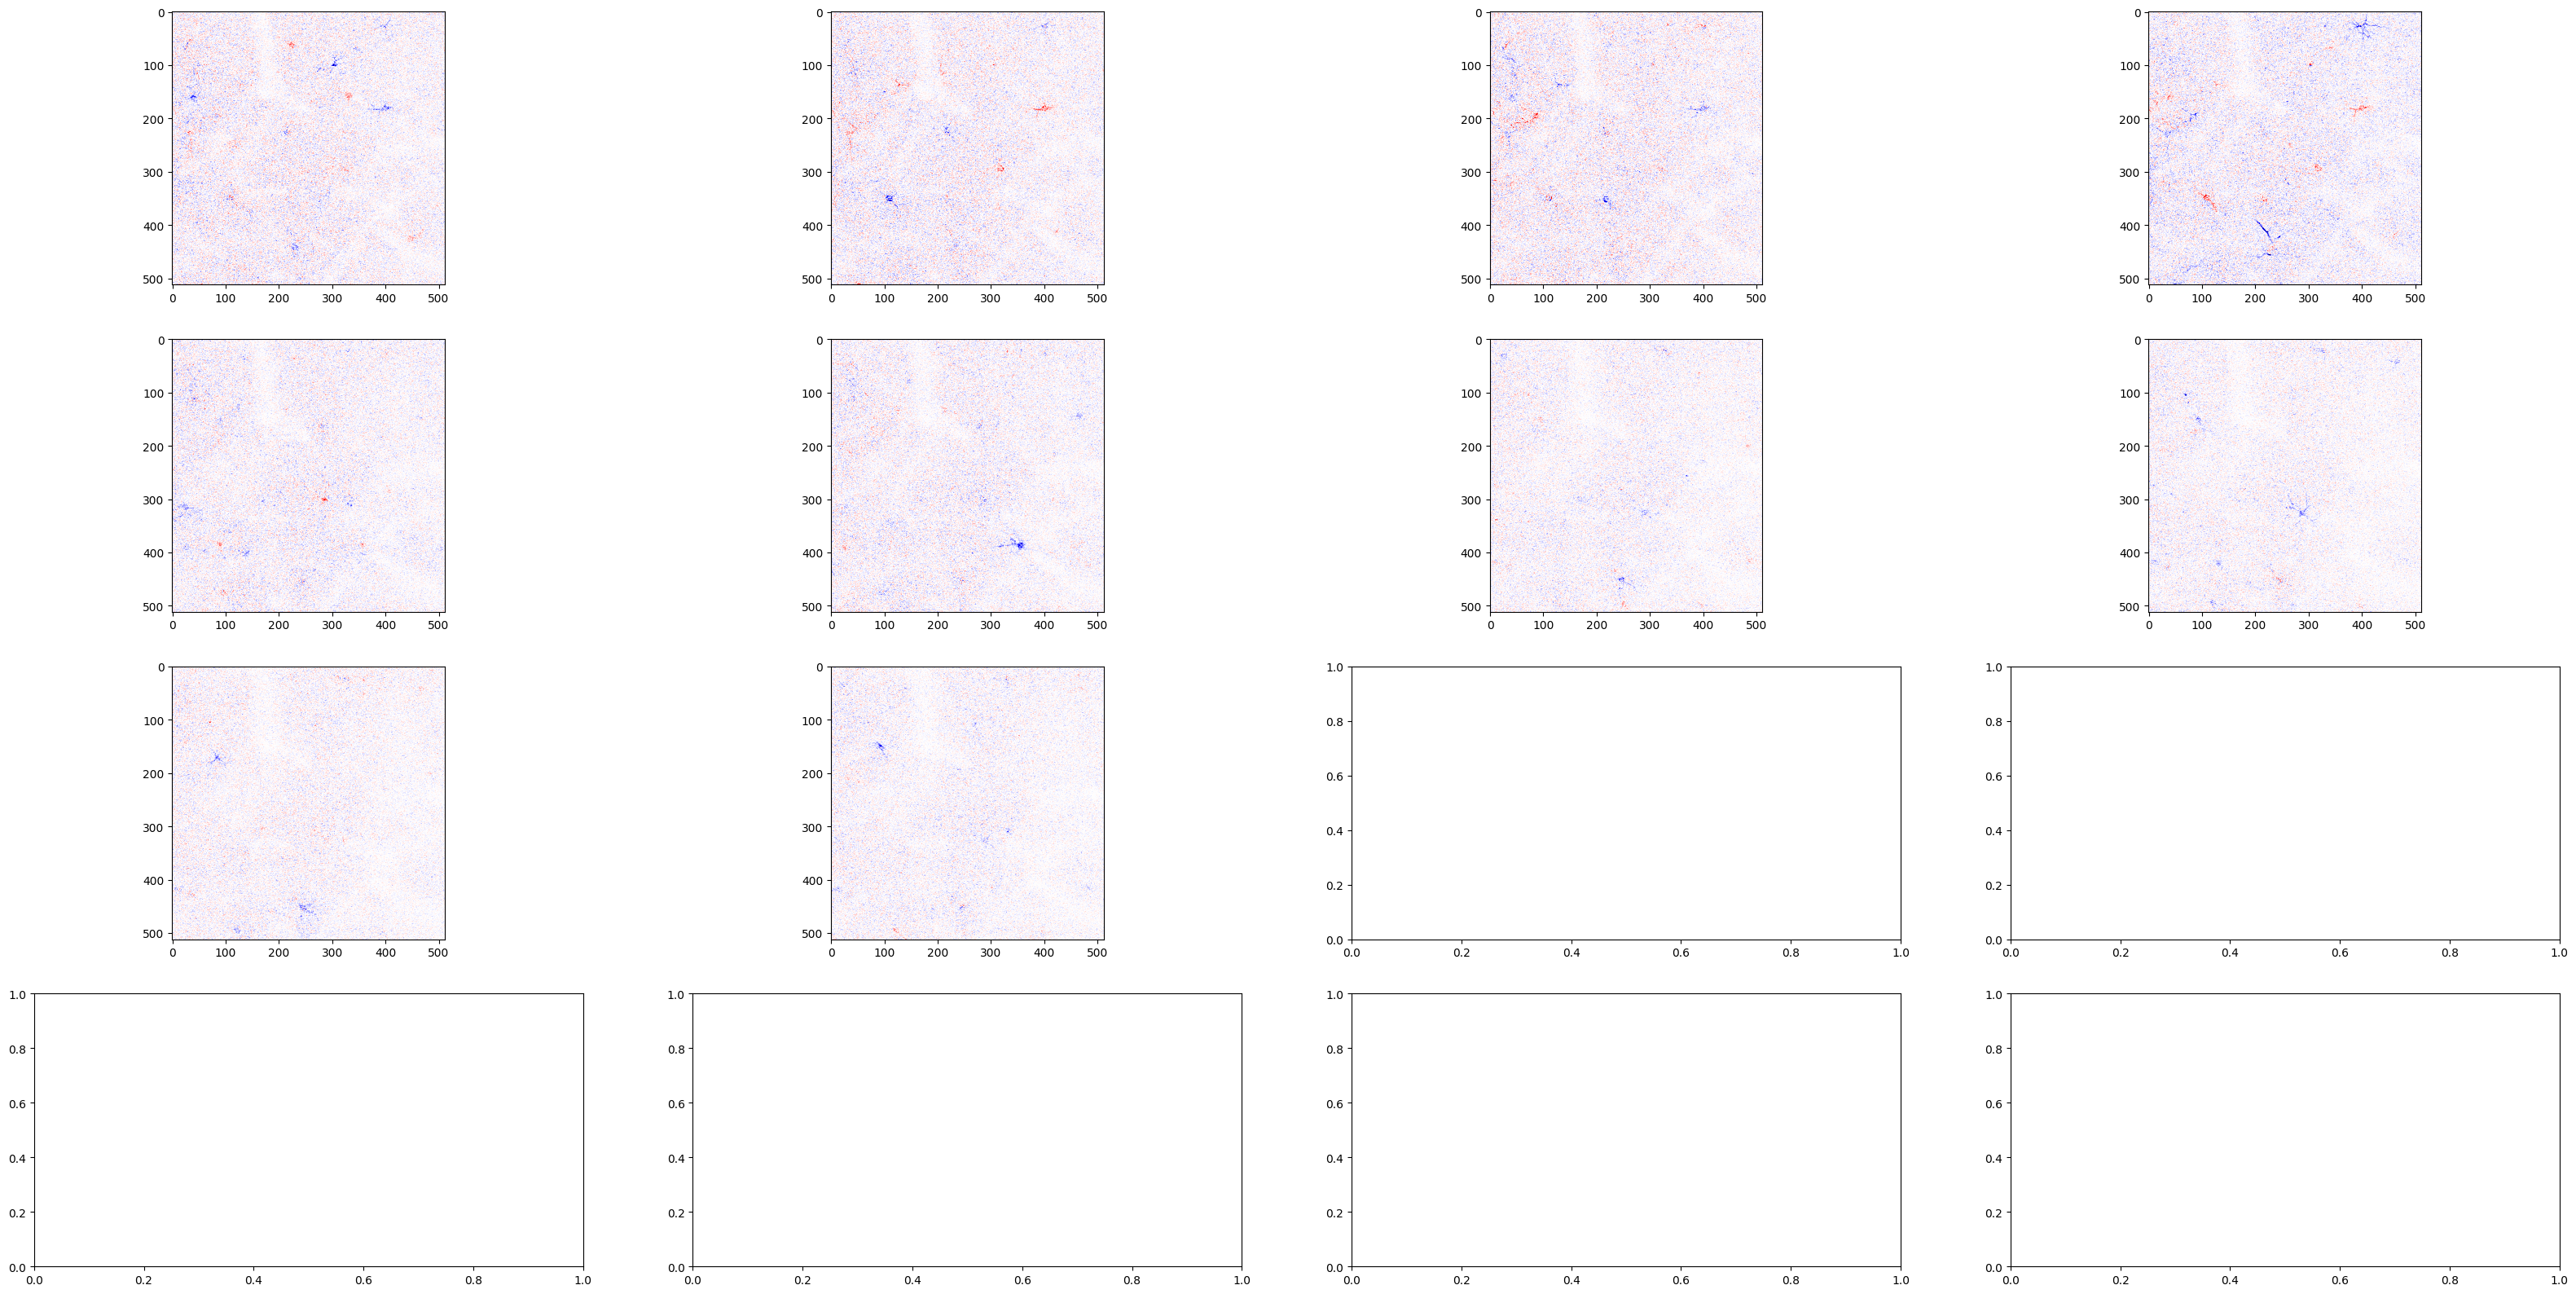

In [32]:
colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
fig, ax = plt.subplots(4,4,figsize=(40,20))
#ax=ax.flatten()
ResponseMap=[None]*len(PlaneSingleP)

for CellI,axSub in enumerate(ax.flatten()):
    Cell=statSingleP[CellI]
    Laser = Laser_values[1]
    statCell[0]=Cell
        #print(Cell)
    Point=CellI+1
    Laser=Laser
    SingL=25
    plane_idx=PlaneSingleP[CellI]
    print(plane_idx)
    matching_files = []
    file_pattern = f'Laser{Laser}Point{Point}.bin'
    #print(file_pattern)
    matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
    print(matching_files)
    ResponseMap[CellI]=BinList_PSTHHeatMap(matching_files,BaselineInd,ResponseInd,ops0)
    print(CellI)
   # ax[CellI].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
    im=axSub.imshow(ResponseMap[CellI][plane_idx,:,:],cmap='seismic',vmin=-1000,vmax=1000)
    #print(SinglePInd)
    #print(SinglePInd[CellI])
    #CellXYtemp=CellXYZ[SinglePInd[CellI],range(2)]
    # Radius=5
   # plotCellCenter(ax[CellI], CellXYtemp, Radius, colorCell, LineWidth)
    #plotCellCenter(axSub, CellXYtemp, Radius, colorCell, LineWidth)


In [32]:
print(matching_files)

[]


0


TypeError: 'NoneType' object is not subscriptable

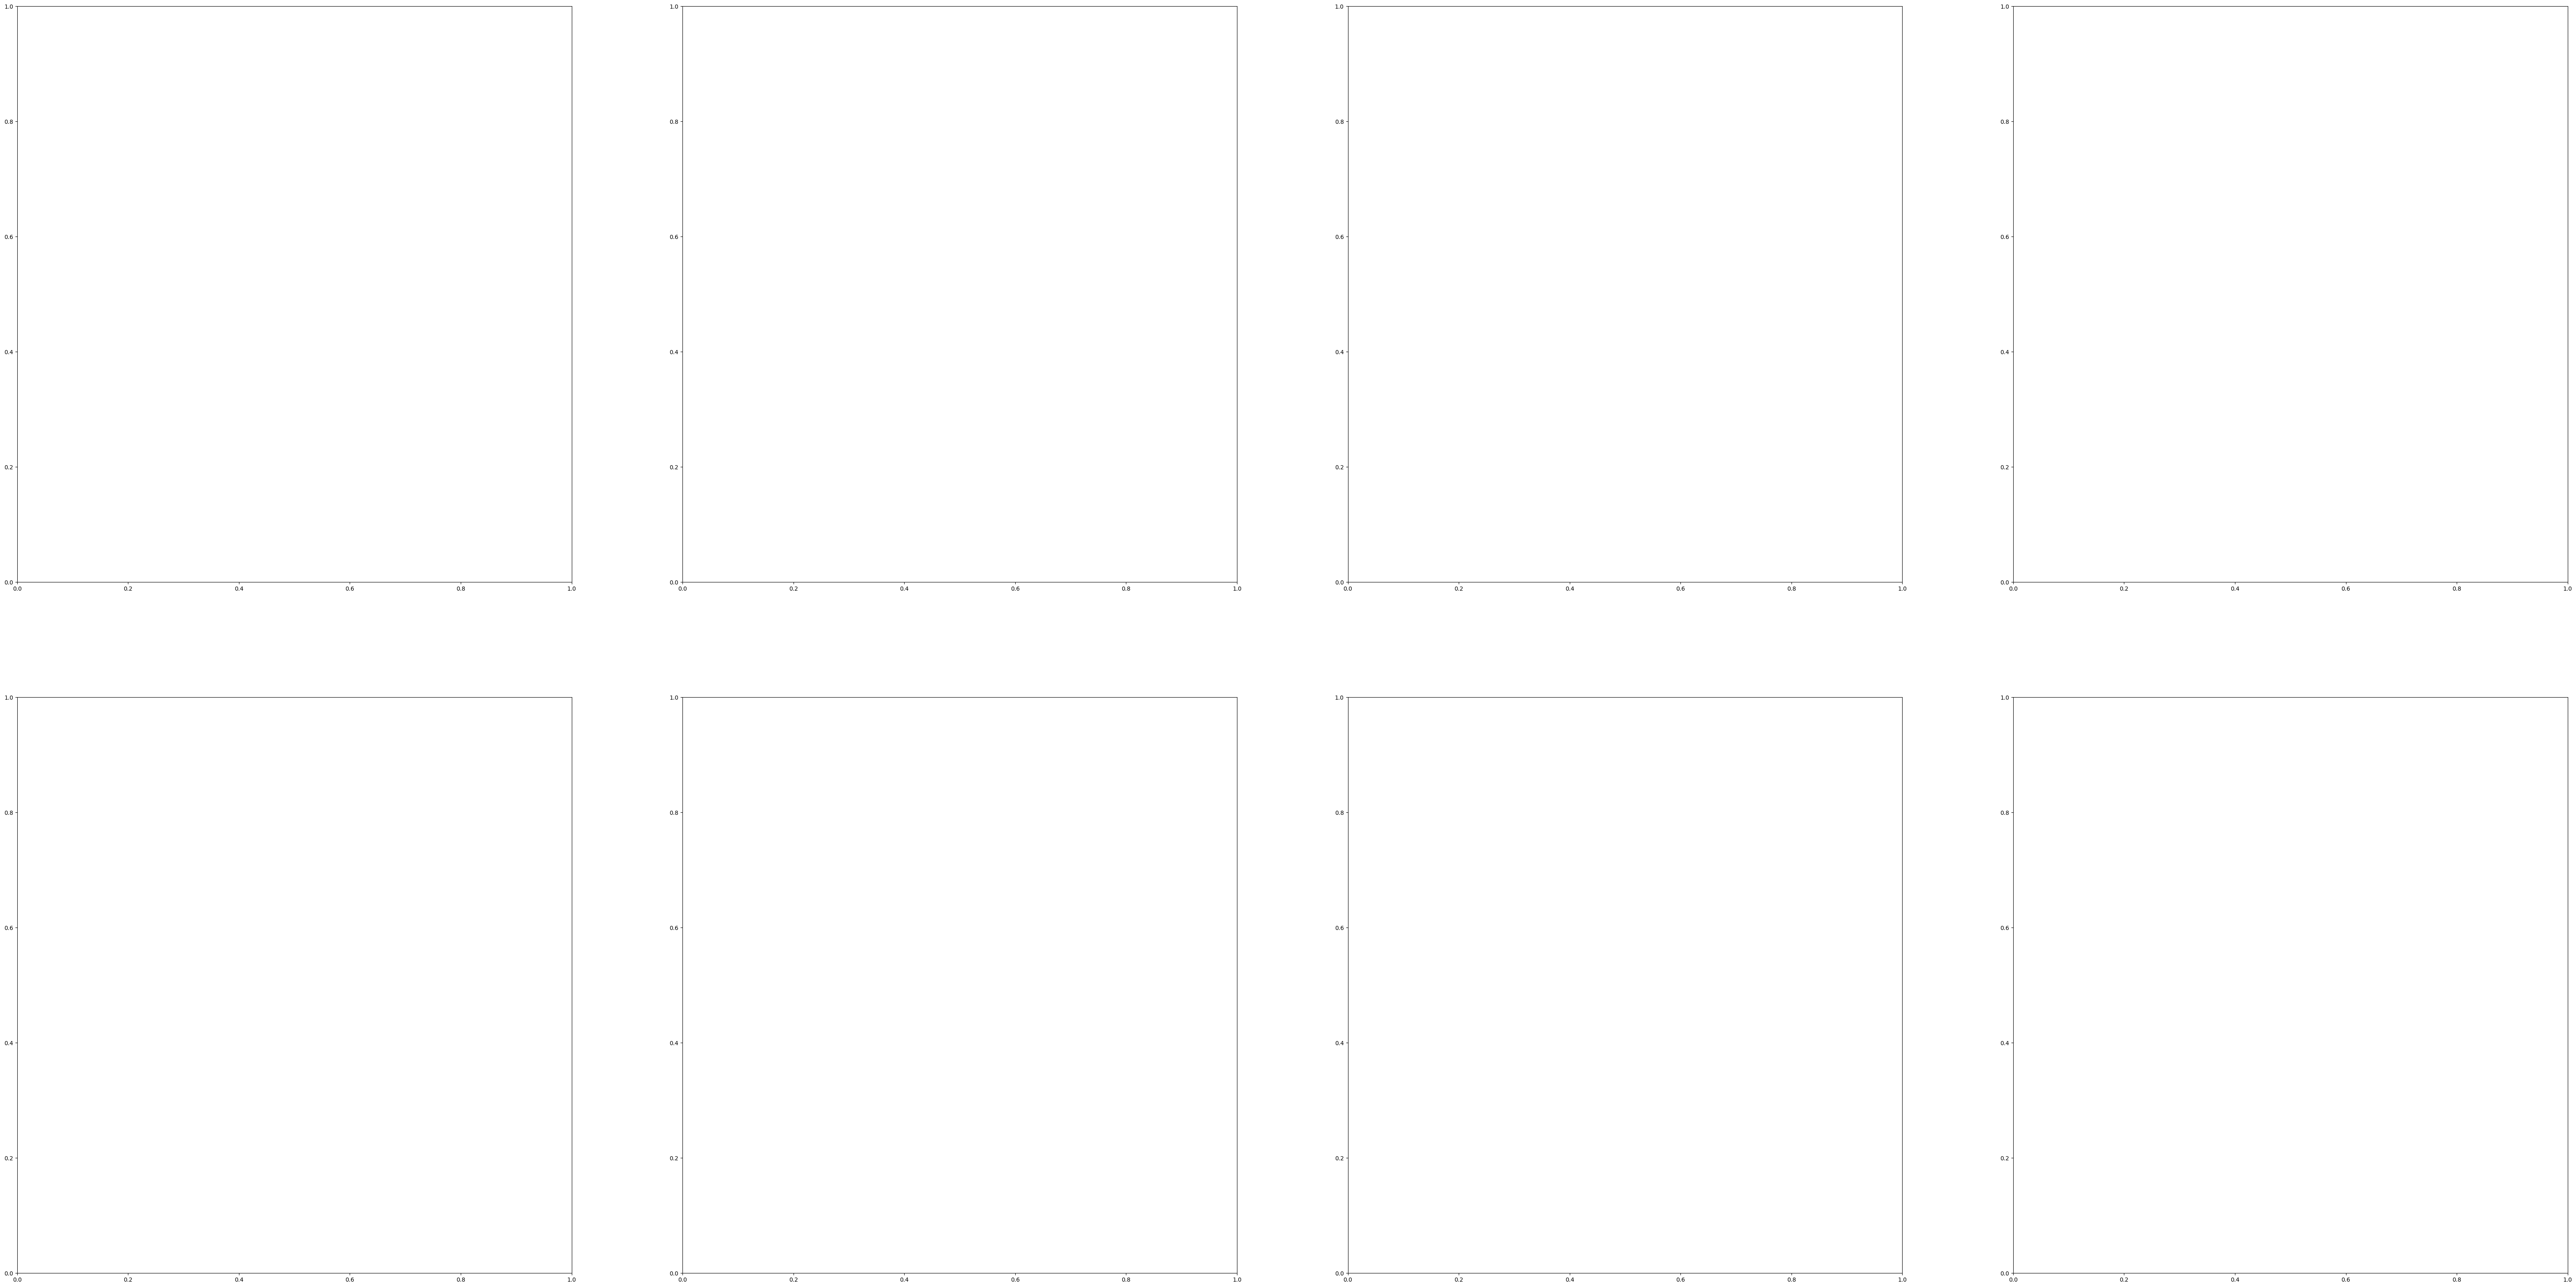

In [40]:
colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=2
fig, ax = plt.subplots(2,4,figsize=(80,40))
#ax=ax.flatten()
Radius=8
CellI=0
#for CellI,axSub in enumerate(ax.flatten()):
for axSub in ax.flatten():
    Cell=statSingleP[CellI]
    Laser = Laser_values[1]
    statCell[0]=Cell
        #print(Cell)
    Point=CellI+1
    Laser=Laser
    SingL=25
    plane_idx=PlaneSingleP[CellI]
    print(plane_idx)
    im=axSub.imshow(ResponseMap[CellI][plane_idx,:,:],cmap='seismic',vmin=-1000,vmax=1000)
    #print(im)
    #print(SinglePInd)
    #print(SinglePInd[CellI])
    CellXYtemp=CellXYZ[SinglePInd[CellI],range(2)]
    # Radius=5
   # plotCellCenter(ax[CellI], CellXYtemp, Radius, colorCell, LineWidth)
    CellXYtemp=CellXYtemp[::-1]
    #plotCellCenter(imT.axis, CellXYtemp, Radius, colorCell, LineWidth)
    circle = Circle(CellXYtemp, Radius, color=colorCell[0], linewidth=LineWidth, fill=False)
    axSub.add_patch(circle)
    CellI+=1
    #plt.show()
cbar = fig.colorbar(im, ax=ax.ravel().tolist())
plt.show()

In [46]:
for CellI,Cell in enumerate(statSingleP):
    Laser = Laser_values[1]
    statCell[0]=Cell
        #print(Cell)
    Point=CellI+1
    Laser=Laser
    SingL=25
    plane_idx=PlaneSingleP[CellI]
#CellActivatedID=UnitNeedI[CellI]
#CellActivatedID=PointI_values[CellI]

    matching_files = []
    file_pattern = f'Laser{Laser}Point{Point}.bin'
    print(file_pattern)
    matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
    ResponseMap=BinList_PSTHHeatMap(matching_files,BaselineInd,ResposeInd,ops0)

    im=ax[CellI].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
    print(SinglePInd)
    print(SinglePInd[CellID])
    CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
    Radius=5
    plotCellCenter(ax[CellI], CellXYtemp, Radius, colorCell, LineWidth)

Laser1.3Point1.bin
F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-011Laser1.3Point1.bin
(120, 512, 512)
120
0
[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117]
1
[  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79  82  85  88  91  94  97 100 103 106
 109 112 115 118]
2
[  2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53
  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 101 104 107
 110 113 116 119]
F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-029Laser1.3Point1.bin
(120, 512, 512)
120
0
[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117]
1
[  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79  82  85  88  91  94  

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

In [92]:
fig, ax = plt.subplots()
for CellI,Cell in enumerate(statSingleP):
    for LaserI,Laser in enumerate(Laser_values):
        statCell[0]=Cell
        #print(Cell)
        Point=CellI+1
        Laser=Laser
        print(Laser)
        SingL=25
        plane_idx=PlaneSingleP[CellI]
#CellActivatedID=UnitNeedI[CellI]
#CellActivatedID=PointI_values[CellI]

        matching_files = []
        file_pattern = f'Laser{Laser}Point{Point}.bin'
        print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
        matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

       
ResponseMap=BinList_PSTHHeatMap(matching_files,BaselineInd,ResposeInd,ops0)
#ax[1].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
ax.imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
print(SinglePInd)
print(SinglePInd[CellID])
CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
Radius=5

colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
plotCellCenter(ax, CellXYtemp, Radius, colorCell, LineWidth)

{'ypix': array([ 74,  75,  75,  76,  77,  77,  78,  78,  78,  78,  78,  79,  79,
        79,  80,  80,  80,  80,  81,  81,  81,  82,  82,  83,  83,  83,
        83,  84,  84,  84,  85,  85,  85,  85,  86,  86,  86,  87,  87,
        87,  87,  87,  87,  87,  87,  87,  87,  88,  88,  88,  88,  88,
        88,  88,  88,  88,  88,  89,  89,  89,  89,  89,  89,  90,  90,
        90,  91,  91,  91,  91,  92,  92,  92,  93,  93,  93,  93,  94,
        94,  94,  94,  94,  94,  95,  95,  95,  95,  95,  95,  95,  95,
        95,  95,  95,  95,  96,  96,  96,  96,  96,  96,  96,  96,  96,
        96,  96,  96,  96,  96,  96,  96,  96,  97,  97,  97,  97,  97,
        97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,
        98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,
        98,  98,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,
        99,  99,  99,  99,  99,  99,  99, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100

In [ ]:
Radius=5
LineWidth=4
PlotXY=CellXYZ[SinglePInd[CellID],range(2)]
print(np.shape(PlotXY))
print(len(np.shape(PlotXY)))
colorCell = plt.cm.jet(range(len(cellCenterGroup)))

fig, ax = plt.subplots(1,3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plotCellCenter3D(ax,PlotXY, Radius, colorCell, LineWidth)

In [8]:
def Suite2pCellIDMap(ops,stat,iscell):
    #"""
    #Get cellIDMap from Suite2p processed data.
    #"""


    cellValid = iscell[:, 0]
    stat=stat[iscell[:, 0]==1]
    #cellIDMap = np.zeros_like(ops['meanImg'])
    cellIDMap = np.zeros((ops['Ly'],ops['Lx']))
    MedCenter = []

    m, n = cellIDMap.shape

    validCellList = np.where(cellValid)[0]

    cellID=0
    for statCell in stat:
        cellID = cellID + 1
        roiPix = np.ravel_multi_index((statCell['ypix'], statCell['xpix']), cellIDMap.shape)
        cellIDMap.flat[roiPix] = cellID

        MedCenter.append([max(min(int(np.median(statCell['ypix'])), m), 1),
                          max(min(int(np.median(statCell['xpix'])), n), 1)])

    MedCenter = np.array(MedCenter)

    temp = np.setdiff1d(cellIDMap, 0)
    CellPixCount = np.histogram(temp, bins=np.arange(temp.min(), temp.max() + 2))[0]

    return cellIDMap, CellPixCount, MedCenter


def plotCellBoundary(cellIDMap, cellIDmark, *args):
    # Check the number of input arguments
    if len(args) < 1:
        colorCell = plt.cm.jet(range(len(cellIDmark)))
        LineWidth = 3
    elif len(args) == 1:
        colorCell = args[0]
        LineWidth = 3
    elif len(args) == 2:
        colorCell = args[0]
        LineWidth = args[1]
    else:
        # Handle other cases if needed
        pass

    # If colorCell is a single row, replicate it for each cellIDmark
    if colorCell.shape[0] == 1:
        colorCell = [colorCell] * len(cellIDmark)

    # Get cell boundaries using the CellIDMap2Boundary function
    cellBoundary = CellIDMap2Boundary(cellIDMap, cellIDmark)

    # Loop through each cell ID
    for i in range(len(cellIDmark)):
        # Loop through each boundary of the current cell ID
        for iB in range(len(cellBoundary[i])):
            # Plot the cell boundary using specified color and LineWidth
            plt.plot(cellBoundary[i][iB][:, 1], cellBoundary[i][iB][:, 0],
                     color=colorCell[i], linewidth=LineWidth)

    plt.show()  # Show the plot


def CellIDMap2Boundary(cellIDMap, cellCandidate=None):
    if cellCandidate is None:
        # Identify unique non-zero cell IDs
        cellCandidate = np.unique(cellIDMap)
        cellCandidate = cellCandidate[cellCandidate != 0]
        cellCandidate = np.sort(cellCandidate)

    cellBoundary = []

    # Loop through each cell candidate
    for icell in cellCandidate:
        # Create a temporary binary map for the current cell
        tempMap = np.zeros_like(cellIDMap)
        tempMap[cellIDMap == icell] = 1

        # Find the boundary of the cell using bwboundaries
        boundaries = measure.find_contours(tempMap, 0.5)

        cellBoundary.append(boundaries)

    return cellBoundary


def MultiMatrix3DPlotZ(ax,Data, ZPlot,vLim,Alpha):
    """
    Plot 3D matrices along the Z dimension.
    """
    X, Y = np.meshgrid(np.arange(Data.shape[1]), np.arange(Data.shape[0]))
    
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    vmax=vLim[1]
    vmin=vLim[0]
    for k in range(Data.shape[2]):
        Z = np.ones_like(Data[:, :, k]) * ZPlot[k]  # Specify Z-values for each surface
        temp=Data[:, :, k]
        ax.plot_surface(X, Y, Z, facecolors=plt.cm.seismic((Data[:, :, k]-vmin)/(vmax-vmin)), alpha=Alpha,shade=False)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()
    return ax


def BinList_PSTHHeatMap(MultiBinFileList,BaselineInd,ResponseInd,ops0):

   # print(BaselineInd)
   # print(ResponseInd)
    nplanes=ops0['nplanes']
    #print(nplanes)
    baseMap=np.zeros((ops0['Ly'],ops0['Lx'],nplanes,len(MultiBinFileList)))
    ResponseMap=np.zeros((ops0['Ly'],ops0['Lx'],nplanes,len(MultiBinFileList)))
    for TrialI,Trial in enumerate(MultiBinFileList):
        rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
        FramePerPlane=np.floor(rawBin.shape[0]/ops0['nplanes'])
        TotalFrameNeed=np.int32(np.floor(FramePerPlane)*nplanes)
    #print(rawBin.shape)
        nplanes=ops0['nplanes']
    
        for plane_id in range(0,nplanes):
           # print(plane_idx)
                #print(range(0+plane_idx,TotalFrameNeed,nplanes))
            plane_data = rawBin[range(0+plane_id,TotalFrameNeed,nplanes),:,:]
        #print(plane_data.shape)
            plane_data=np.array(plane_data)
            DimEnd=len(baseMap.shape)
            baseMap[:,:,plane_id,TrialI]=np.mean(plane_data[BaselineInd,:,:],axis=0)
            ResponseMap[:,:,plane_id,TrialI]=np.mean(plane_data[ResponseInd,:,:],axis=0)

    DimEnd=len(baseMap.shape)
    baseMap=np.mean(baseMap,axis=DimEnd-1)
    ResponseMap=np.mean(ResponseMap,axis=DimEnd-1)-baseMap
    #ResponseMap=ResponseMap-baseMap
    return ResponseMap

In [210]:
# Iterate over X and Y values and search for matching files
#PointFile=[None]*len(PointI_values)

for Ind,Trial in enumerate(matching_files):
    rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
    print(rawBin.shape)
    print(Trial)
    plane_data = rawBin[range(0+plane_idx,SingL*nplanes,nplanes),:,:]
    
    stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statCell, f_reg=plane_data,
                                                          f_reg_chan2 = plane_data,ops=ops0)
    dF = F.copy() - ops1['neucoeff']*Fneu

    dF = suite2p.extraction.preprocess(
    F=dF,
    baseline=ops1['baseline'],
    win_baseline=ops1['win_baseline'],
    sig_baseline=ops1['sig_baseline'],
    fs=ops1['fs'],
    prctile_baseline=ops1['prctile_baseline']
    )
    PSTH[:,Ind]=np.double(F)

preStim=range(0,10)
print(PSTH.shape)
baseLine=np.mean(np.mean(PSTH[preStim,:],axis=1),axis=0)
Response=np.mean(PSTH,axis=1)
print(Response.shape)
#baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
#plt.imshow(np.mean(PSTH,axis=1)-baseLine,cmap='seismic')
np.shape(Response-baseLine)


#fig, ax = plt.subplots(1,3)
#ax[0].imshow(baseMap[:,:,0],cmap='seismic')

(76, 512, 512)
F:\LuSLMOnlineTest\03052024\TSeries-03052024-1138-025Laser1.3Point16.bin
Masks created, 1.68 sec.
Extracted fluorescence from 1 ROIs in 25 frames, 0.03 sec.
Extracted fluorescence from 1 ROIs in 25 frames, 0.04 sec.
(77, 512, 512)
F:\LuSLMOnlineTest\03052024\TSeries-03052024-1138-057Laser1.3Point16.bin
Masks created, 1.74 sec.
Extracted fluorescence from 1 ROIs in 25 frames, 0.03 sec.
Extracted fluorescence from 1 ROIs in 25 frames, 0.04 sec.
(77, 512, 512)
F:\LuSLMOnlineTest\03052024\TSeries-03052024-1138-089Laser1.3Point16.bin
Masks created, 1.71 sec.
Extracted fluorescence from 1 ROIs in 25 frames, 0.02 sec.
Extracted fluorescence from 1 ROIs in 25 frames, 0.04 sec.
(76, 512, 512)
F:\LuSLMOnlineTest\03052024\TSeries-03052024-1138-121Laser1.3Point16.bin
Masks created, 1.69 sec.
Extracted fluorescence from 1 ROIs in 25 frames, 0.03 sec.
Extracted fluorescence from 1 ROIs in 25 frames, 0.05 sec.
(75, 512, 512)
F:\LuSLMOnlineTest\03052024\TSeries-03052024-1138-153Laser1.3

(25,)

NameError: name 'baseMap' is not defined

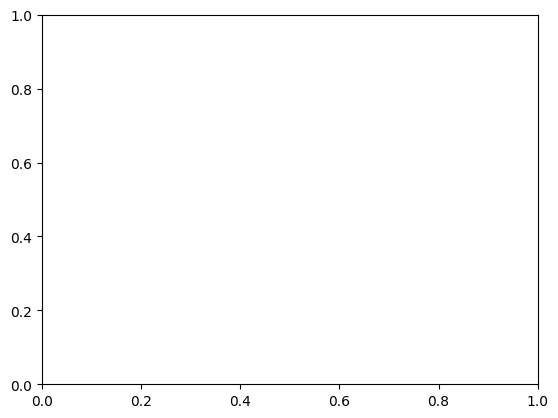

In [214]:
fig, ax = plt.subplots()
ax.imshow(baseMap[:,:,0],cmap='seismic')

In [10]:
def plotCellCenter3DGroup(cellCenterGroup, Radius, *args):
    if len(args) < 1:
        colorCell = plt.cm.jet(range(len(cellCenterGroup)))
        LineWidth = 1
    elif len(args) == 1:
        colorCell = args[0]
        LineWidth = 1
    elif len(args) == 2:
        colorCell = args[0]
        LineWidth = args[1]
    else:
        # Handle other cases if needed
        pass

    if len(colorCell) == 1:
        colorCell = np.tile(colorCell, (len(cellCenterGroup), 1))

    #print(Radius.shape)
    if Radius.shape[0] == 1:
        Radius = np.tile(Radius, len(cellCenterGroup))
        
    #print(Radius.shape)
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')

    for iGroup in range(len(cellCenterGroup)):
        if cellCenterGroup[iGroup] is not None:
            plotCellCenter3D(cellCenterGroup[iGroup], Radius[iGroup], colorCell[iGroup], LineWidth)

    plt.show()
    return ax

def plotCellCenter3D(ax,cellCenter, Radius, colorCell, LineWidth):
    if len(colorCell) == 1:
        colorCell = np.tile(colorCell, (cellCenter.shape[0], 1))

    if np.shape(Radius) == 1:
        Radius = np.tile(Radius, cellCenter.shape[0])
    
    #print(Radius.shape)
    plt.show()
    if len(cellCenter.shape)==1:
       cellN=1
       CoorDim=len(cellCenter)
    else:
       CoorDim=cellCenter.shape[1]
    
    if CoorDim == 2:
        cellCenter = np.hstack((cellCenter, np.zeros((len(cellCenter), 1))))

    for i in range(cellN):
        theta = np.linspace(0, 2*np.pi, 50)
        x = cellCenter[i, 1] + Radius[i] * np.cos(theta)
        y = cellCenter[i, 0] + Radius[i] * np.sin(theta)
        z = np.zeros_like(x) + cellCenter[i, 2]
        ax.plot(x, y, z, color=colorCell[i], linewidth=LineWidth, linestyle='-')
        plt.show()
    
   # ax.set_xlabel('X-axis')
   # ax.set_ylabel('Y-axis')
    ##ax.set_zlabel('Z-axis')
   # ax.set_title('Cell Centers with Circles (3D)')


F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-003Laser1.2Point2.bin
(120, 512, 512)
120
0
[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117]
1
[  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79  82  85  88  91  94  97 100 103 106
 109 112 115 118]
2
[  2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53
  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 101 104 107
 110 113 116 119]
F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-012Laser1.3Point2.bin
(120, 512, 512)
120
0
[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117]
1
[  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79  82  85  88  91  94  97 100 103 106
 109

IndexError: list index out of range

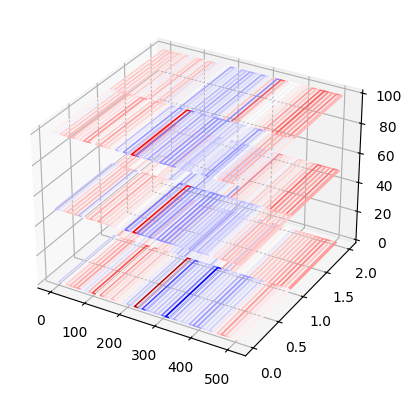

In [54]:
BaselineInd=range(2,10)

ResposeInd=range(12,25)
matching_files = []
#file_pattern = f'Laser{Laser}Point{2}.bin'
file_pattern = f'Point{2}.bin'
#print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

#print(matching_files)
ResponseMap=BinList_PSTHHeatMap(matching_files,BaselineInd,ResposeInd,ops0)


#fig, ax = plt.subplots(1,3)
#ax[0].imshow(baseMap[:,:,0],cmap='seismic')
#ax[1].imshow(ResponseMap[:,:,1],cmap='seismic')
#ax[2].imshow(ResponseMap[:,:,2],cmap='seismic')

# Example usage
ZPlot = [0,50,100]
vLim=[-1000,1000]
# Assuming you have defined ResponseMap elsewhere
#fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
MultiMatrix3DPlotZ(ax,ResponseMap, ZPlot,vLim,0.1)
plt.show()
cellCenterGroup=[None]*1
cellCenterGroup[0]=CellXYZ[[1,3,5,11,9,15,19],:]
Radius=[12]
Radius=np.array(Radius)
#len(Radius)

colorCell = plt.cm.jet(np.linspace(0, 1, 8))

LineWidth=20
plotCellCenter3D(ax,cellCenterGroup[0], Radius, colorCell, LineWidth)
#plotCellCenter3DGroup(ax,cellCenterGroup, Radius)
#plt.imshow(ResponseMap[:,:,1],cmap='viridis')
#plt.cm.viridis(Data[:, :, k])

In [ ]:
Radius = [12]
Radius = np.array(Radius)

colorCell = plt.cm.jet(5)

LineWidth = 3

# Assuming cellCenterGroup is defined elsewhere


plotCellCenter3D(ax, CellXYZ[[1,3,5],:], Radius, colorCell, LineWidth)

plt.show()  # Call plt.show() after all plotting is done

In [221]:
def BinList_PSTHHeatMap(MultiBinFileList,BaselineInd,ResponseInd,ops0):

   # print(BaselineInd)
   # print(ResponseInd)
    nplanes=ops0['nplanes']
    #print(nplanes)
    baseMap=np.zeros(len(MultiBinFileList)),nplanes,(ops0['Ly'],ops0['Lx'])
    ResponseMap=np.zeros(len(MultiBinFileList)),nplanes,(ops0['Ly'],ops0['Lx'])
    for TrialI,Trial in enumerate(MultiBinFileList):
        rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
        FramePerPlane=np.floor(rawBin.shape[0]/ops0['nplanes'])
        TotalFrameNeed=np.int32(np.floor(FramePerPlane)*nplanes)
    #print(rawBin.shape)
        nplanes=ops0['nplanes']
    
        for plane_id in range(0,nplanes):
           # print(plane_id)
                #print(range(0+plane_id,TotalFrameNeed,nplanes))
            plane_data = rawBin[range(0+plane_id,TotalFrameNeed,nplanes),:,:]
        #print(plane_data.shape)
            plane_data=np.array(plane_data)

            baseMap[TrialI,plane_id,:,:]=np.mean(plane_data[BaselineInd,:,:],axis=0)
            ResponseMap[TrialI,plane_id,:,:]=np.mean(plane_data[ResponseInd,:,:],axis=0)

    #DimEnd=len(baseMap.shape)
    baseMap=np.mean(baseMap,axis=0)
    ResponseMap=np.mean(ResponseMap,axis=0)-baseMap
    #ResponseMap=ResponseMap-baseMap
    return ResponseMap


In [18]:
np.array(range(0,len(statSingleP),4))

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
       68, 72, 76, 80, 84])

In [56]:
PointI_values

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
# Iterate over X and Y values and search for matching files
#PointFile=[None]*len(PointI_values)
TrialNum=3
PostPSTH=np.zeros((len(PointI_values),len(Laser_values),len(statSingleP),TrialNum))
print(base_dir)

CellID=2
Point=PointI_values[CellID]
Laser=Laser_values[1]
print(Laser)
SingL=30
plane_idx=PlaneSingleP[CellID]
#CellActivatedID=UnitNeedI[CellID]
CellActivatedID=PointI_values[CellID]-1

matching_files = []
file_pattern = f'Laser{Laser}Point{Point}.bin'
print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

print(matching_files)
ops1=ops0

PSTH=np.zeros((len(statSingleP),SingL,TrialNum))
for Ind,Trial in enumerate(matching_files):
    rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
    print(rawBin.shape)
    print(Trial)
    plane_data = rawBin[range(0+plane_idx,SingL*nplanes,nplanes),:,:]
    
    stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statSingleP, f_reg=plane_data,
                                                          f_reg_chan2 = plane_data,ops=ops0)
    dF = F.copy() - ops1['neucoeff']*Fneu

    dF = suite2p.extraction.preprocess(
    F=dF,
    baseline=ops1['baseline'],
    win_baseline=ops1['win_baseline'],
    sig_baseline=ops1['sig_baseline'],
    fs=ops1['fs'],
    prctile_baseline=ops1['prctile_baseline']
    )
    PSTH[:,:,Ind]=np.double(dF)

preStim=range(0,10)
baseLine=np.mean(np.mean(PSTH[:,preStim,:],axis=2),axis=1)
print(np.shape(baseLine.T))
baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
plt.imshow(np.mean(PSTH,axis=2)-baseLine,cmap='seismic',vmin=-200,vmax=200)
plt.plot(0,CellActivatedID,'g*')
print(CellActivatedID)

F:\LuSLMOnlineTest\03082024\\
1.3
Laser1.3Point3.bin
['F:\\LuSLMOnlineTest\\03082024\\TSeries-03082024-1105-013Laser1.3Point3.bin', 'F:\\LuSLMOnlineTest\\03082024\\TSeries-03082024-1105-031Laser1.3Point3.bin', 'F:\\LuSLMOnlineTest\\03082024\\TSeries-03082024-1105-049Laser1.3Point3.bin', 'F:\\LuSLMOnlineTest\\03082024\\TSeries-03082024-1105-067Laser1.3Point3.bin', 'F:\\LuSLMOnlineTest\\03082024\\TSeries-03082024-1105-085Laser1.3Point3.bin']
(120, 512, 512)
F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-013Laser1.3Point3.bin
Masks created, 0.59 sec.


c:\users\user\suite2p\suite2p\extraction\extract.py:125: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  Fi[n] = np.dot(data[:, cell_ipix[n]], cell_lam[n])


Extracted fluorescence from 9 ROIs in 30 frames, 5.71 sec.
Extracted fluorescence from 9 ROIs in 30 frames, 0.05 sec.
(120, 512, 512)
F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-031Laser1.3Point3.bin
Masks created, 0.59 sec.
Extracted fluorescence from 9 ROIs in 30 frames, 0.03 sec.
Extracted fluorescence from 9 ROIs in 30 frames, 0.06 sec.
(120, 512, 512)
F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-049Laser1.3Point3.bin
Masks created, 0.59 sec.
Extracted fluorescence from 9 ROIs in 30 frames, 0.03 sec.
Extracted fluorescence from 9 ROIs in 30 frames, 0.06 sec.
(120, 512, 512)
F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-067Laser1.3Point3.bin
Masks created, 0.58 sec.
Extracted fluorescence from 9 ROIs in 30 frames, 0.03 sec.
Extracted fluorescence from 9 ROIs in 30 frames, 0.05 sec.


IndexError: index 3 is out of bounds for axis 2 with size 3

In [ ]:
preStim=range(0,10)
baseLine=np.mean(np.mean(PSTH[:,preStim,:],axis=2),axis=1)
print(np.shape(baseLine.T))
baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
plt.imshow(np.mean(PSTH,axis=2)-baseLine,cmap='seismic')
plt.plot(0,CellActivatedID,'r*')

In [85]:
print(Ind)
#dF.shape
PSTH[:,:,Ind]=np.double(dF)
dF.shape
PSTH.shape

0


(85, 30, 3)

In [86]:
PSTH[:,:,Ind]=np.double(dF)

In [50]:
# Iterate over X and Y values and search for matching files
PointFile=[None]*len(PointI_values)
TrialNum=3
PostPSTH=np.zeros((len(PointI_values),len(Laser_values)),len(statSingleP),TrialNum)

for Idx,Point in enumerate(PointI_values):
    PointFile[Idx]=[None]*len(Laser_values)
    for jdx,Laser in enumerate(Laser_values):
        matching_files = []
        # Construct the filename pattern
    #filename = file_pattern.format(X, Y)
    #filename = file_pattern.format(Point)
        file_pattern = f'Laser{Laser}Point{Point}.bin'
    #print(filename)
        # Search for files matching the pattern in the directory
    #print(os.path.join(base_dir, '**', filename))
    #files = glob.glob(os.path.join(base_dir, '**', filename), recursive=True)
   # print(files)
        # Add matching files to the list
    #matching_files.extend(files)
        matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
        PointFile[Idx][jdx]=matching_files
        print(matching_files)


NameError: name 'PointI_values' is not defined

In [25]:
PointFile[0][1]

['F:\\LuSLMOnlineTest\\02292024\\TSeries-02292024-1001-024Laser1.4Point1.bin',
 'F:\\LuSLMOnlineTest\\02292024\\TSeries-02292024-1001-068Laser1.4Point1.bin',
 'F:\\LuSLMOnlineTest\\02292024\\TSeries-02292024-1001-112Laser1.4Point1.bin']

In [26]:
np.shape(PointFile)

(22, 2, 3)

In [76]:
# Print the matching file paths
PreStimN=15
PostStimN=25

PreStim=range(0,15)
PostStim=range(PreStimN,PreStimN+PostStimN)
plane_idx=0


In [50]:
ops1=ops0
plane_idx=0
for Point in PointFile:
    for Laser in Point:
        for Trial in Laser:
            rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
            print(rawBin.shape)
            print(Trial)
            plane_data = rawBin[range(0+plane_idx,rawBin.shape[0],nplanes),:,:]
           # nFrame = rawBin.shape[0] // nplanes
        #print(nFrame)
        #statSingleP
            stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statSingleP, f_reg=plane_data,
                                                                   f_reg_chan2 = plane_data,ops=ops0)
            dF = F.copy() - ops1['neucoeff']*Fneu

            dF = suite2p.extraction.preprocess(
            F=dF,
            baseline=ops1['baseline'],
            win_baseline=ops1['win_baseline'],
            sig_baseline=ops1['sig_baseline'],
            fs=ops1['fs'],
            prctile_baseline=ops1['prctile_baseline']
           )

TypeError: 'NoneType' object is not iterable

In [49]:
#plt.imshow(dF)
np.shape(dF)
#plt.plot(dF.T)

NameError: name 'dF' is not defined

(25, 512, 512)


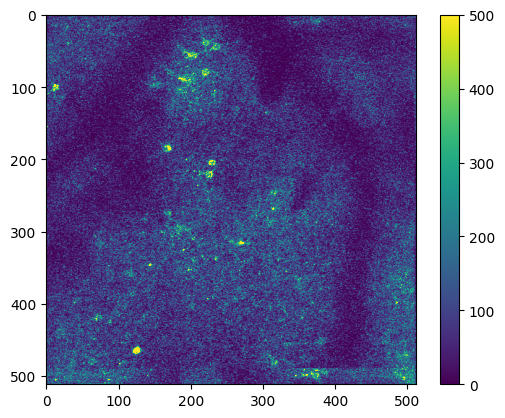

In [216]:
 plane_idx=0
 TotalFrameNeed=rawBin.shape[0]
 nplanes=3;
 plane_data = rawBin[range(0+plane_idx,TotalFrameNeed,nplanes),:,:]
   # plane_data = rawBin[range(0+plane_idx,TotalFrameNeed,nplanes),:,::-1]
    #ops, stat = suite2p.detection_wrapper(f_reg=plane_data, ops=ops1)
  #  ops['nframes']=nFrame
    #ops['meanImg']=np.mean(plane_data,axis=0)
   #meanImg=np.mean(plane_data,axis=0)
print(plane_data.shape)
plt.imshow(np.mean(plane_data,axis=0),vmin=0,vmax=500)
plt.colorbar()
#np.shape(data)
#data=np.read(rawBin)
#plt.imshow(np.mean(data,3))
#plt.imshow(np.mean(np.double(rawBin)), cmap='viridis')

In [66]:
for file_path in PointFile:
    for Trial in file_path:
        rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
        print(rawBin.shape)
        plane_data = rawBin[range(0+plane_idx,rawBin.shape[0],nplanes),:,:]
        nFrame = rawBin.shape[0] // nplanes
        #print(nFrame)
        #statSingleP
        stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statSingleP, f_reg=plane_data,
                                                                   f_reg_chan2 = plane_data,ops=ops0)

NameError: name 'PointFile' is not defined

In [22]:
F

NameError: name 'F' is not defined